**Credit Card Fraud Transaction Data** 

Shenoy, K. (2019). Credit Card Transactions Fraud Detection Dataset. Kaggle.com. https://www.kaggle.com/datasets/kartik2112/fraud-detection

*Reading in the dataset and importing relevant packages* 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import datetime
import calendar

In [2]:
fraud_train = pd.read_csv('/content/drive/MyDrive/CIND 820/fraudTrain.csv') 
fraud_train.shape[0]

1296675

In [3]:
fraud_test = pd.read_csv('/content/drive/MyDrive/CIND 820/fraudTest.csv') 
fraud_test.shape[0]

555719

In [4]:
fraud = pd.concat([fraud_train, fraud_test]) 
fraud.shape[0] # Gives total number of observations

1852394

In [5]:
fraud.head(5)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

*Cleaning*

In [6]:
fraud.dtypes 

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
pd.value_counts(fraud.dtypes) # Shows the frequency of the relevant data types in data set 

object     12
int64       6
float64     5
dtype: int64

Checking the data types for all the variables in the dataset, we can see that trans_date_trans_time and dob (date of birth) are of an 'object' data type, which is not correct. 

Knowing this, both of these variables need to be converted into their appropriate data type, which is datetime.  

In [8]:
fraud[['trans_date_trans_time', 'dob']] = fraud[['trans_date_trans_time', 'dob']].apply(pd.to_datetime) 
fraud.dtypes[['trans_date_trans_time', 'dob']] # Check 

trans_date_trans_time    datetime64[ns]
dob                      datetime64[ns]
dtype: object

Looking first with trans_date_trans_time, we can extract the month, year, and day of the week of each observation and create a variable for each one. 

In [9]:
# For transaction month
fraud['month'] = fraud['trans_date_trans_time'].dt.month_name()
fraud['month'].head(5) # Check

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

In [10]:
fraud['month'].value_counts() # Displays the frequency for each month

December     280598
August       176118
June         173869
July         172444
May          146875
March        143789
November     143056
September    140185
October      138106
April        134970
January      104727
February      97657
Name: month, dtype: int64

Examing the distribution of the number of observations by month, it is shown that December appears more frequently in the data set where 280,598 observations out of 1,852,394 observations are in that month. It can be inferred that this is most likely due to people shopping for the holiday season.  

In [11]:
# For transaction day 
fraud['day'] = fraud['trans_date_trans_time'].dt.strftime('%A')

In [12]:
fraud['day'].value_counts() # Displays the frequency of each day of the week 

Monday       369418
Sunday       343677
Tuesday      270340
Saturday     263227
Friday       215078
Thursday     206741
Wednesday    183913
Name: day, dtype: int64

As for days, approximately 19.94% of the observations are assigned to Monday, meaning that most people conduct their transactions on a Monday.

In [13]:
# For transaction year
fraud['year'] = fraud['trans_date_trans_time'].dt.strftime('%Y')

In [14]:
fraud['year'].value_counts() # Displays the distribution between the 2 years 

2020    927544
2019    924850
Name: year, dtype: int64

In terms of years, both 2019 and 2020 are almost equally repsented in the data set, 49.93% and 50.07% respectively. 

Similarly, we can use 'dob' to create an age variable. 

In [15]:
difference = fraud['trans_date_trans_time'] - fraud['dob'] 
fraud['age'] = difference.dt.days // 365

In [16]:
fraud['age'].head(5) # Check 

0    30
1    40
2    56
3    52
4    32
Name: age, dtype: int64

Now that we have gathered and generated a year, month, weekday, and age variable from 'trans_date_trans_time' and 'dob', we can drop both of these variables from the dataset. As well, we can also drop 'Unnamed: 0' as it does not contain valuable information to aid in our analysis.  

In [17]:
fraud = fraud.drop(['trans_date_trans_time', 'dob', 'Unnamed: 0'], axis=1)

Looking back at the data types above, we see that 'cc_num' (credit card number) and zip' are of numeric data type (int64). Since credit card number serves as an identifer and that zip code is a type of geographic information, it would need to be converted into a categorical data type as peforming numerical calculations for both would not output anything useful.  
 

In [18]:
fraud[['cc_num','zip']] = fraud[['cc_num', 'zip']].apply(str)

*Exploring the data*

Checking again the first 5 observations of the dataset. 

In [19]:
fraud.head(5)

cc_num  \
0  0         2703186189652095\n1             6304...   
1  0         2703186189652095\n1             6304...   
2  0         2703186189652095\n1             6304...   
3  0         2703186189652095\n1             6304...   
4  0         2703186189652095\n1             6304...   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state  ...  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  ...   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  ...   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  ...   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  ...   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  ...   

                                 job                         trans_num  \
0          Psychologist, counselling  0b242abb623afc578575680df30655b9   
1  Special educational needs teacher  1f76529f8574734946361c461b024d99   
2        Nature conservation officer  a1a22d70485983eac12b5b88dad1cf95   
3                    Patent attorney  6b849c168bdad6f867558c3793159a81   
4     Dance movement psychotherapist  a41d7549acf90789359a9aa5346dcb46   

    unix_time  merch_lat  merch_long is_fraud    month      day  year  age  
0  1325376018  36.011293  -82.048315        0  January  Tuesday  2019   30  
1  1325376044  49.159047 -118.186462        0  January  Tuesday  2019   40  
2  1325376051  43.150704 -112.154481        0  January  Tuesday  2019   56  
3  1325376076  47.034331 -112.561071        0  January  Tuesday  2019   52  
4  1325376186  38.674999  -78.632459        0  January  Tuesday  2019   32  

[5 rows x 24 columns]

In [20]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      object 
 1   merchant    object 
 2   category    object 
 3   amt         float64
 4   first       object 
 5   last        object 
 6   gender      object 
 7   street      object 
 8   city        object 
 9   state       object 
 10  zip         object 
 11  lat         float64
 12  long        float64
 13  city_pop    int64  
 14  job         object 
 15  trans_num   object 
 16  unix_time   int64  
 17  merch_lat   float64
 18  merch_long  float64
 19  is_fraud    int64  
 20  month       object 
 21  day         object 
 22  year        object 
 23  age         int64  
dtypes: float64(5), int64(4), object(15)
memory usage: 353.3+ MB


In [21]:
fraud.describe()

amt           lat          long      city_pop     unix_time  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   7.006357e+01  3.853931e+01 -9.022783e+01  8.864367e+04  1.358674e+09   
std    1.592540e+02  5.071470e+00  1.374789e+01  3.014876e+05  1.819508e+07   
min    1.000000e+00  2.002710e+01 -1.656723e+02  2.300000e+01  1.325376e+09   
25%    9.640000e+00  3.466890e+01 -9.679800e+01  7.410000e+02  1.343017e+09   
50%    4.745000e+01  3.935430e+01 -8.747690e+01  2.443000e+03  1.357089e+09   
75%    8.310000e+01  4.194040e+01 -8.015800e+01  2.032800e+04  1.374581e+09   
max    2.894890e+04  6.669330e+01 -6.795030e+01  2.906700e+06  1.388534e+09   

          merch_lat    merch_long      is_fraud           age  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   3.853898e+01 -9.022794e+01  5.210015e-03  4.579690e+01  
std    5.105604e+00  1.375969e+01  7.199217e-02  1.742393e+01  
min    1.902742e+01 -1.666716e+02  0.000000e+00  1.300000e+01  
25%    3.474012e+01 -9.689944e+01  0.000000e+00  3.200000e+01  
50%    3.936890e+01 -8.744069e+01  0.000000e+00  4.400000e+01  
75%    4.195626e+01 -8.024511e+01  0.000000e+00  5.700000e+01  
max    6.751027e+01 -6.695090e+01  1.000000e+00  9.600000e+01

In [22]:
fraud.isna().values.sum()

0

There are no missing values in the dataset. 

In [23]:
fraud.nunique()

cc_num              1
merchant          693
category           14
amt             60616
first             355
last              486
gender              2
street            999
city              906
state              51
zip                 1
lat               983
long              983
city_pop          891
job               497
trans_num     1852394
unix_time     1819583
merch_lat     1754157
merch_long    1809753
is_fraud            2
month              12
day                 7
year                2
age                84
dtype: int64

The values above displays the number of unique values for each variable. 

Checking the distribution of variables with binary values

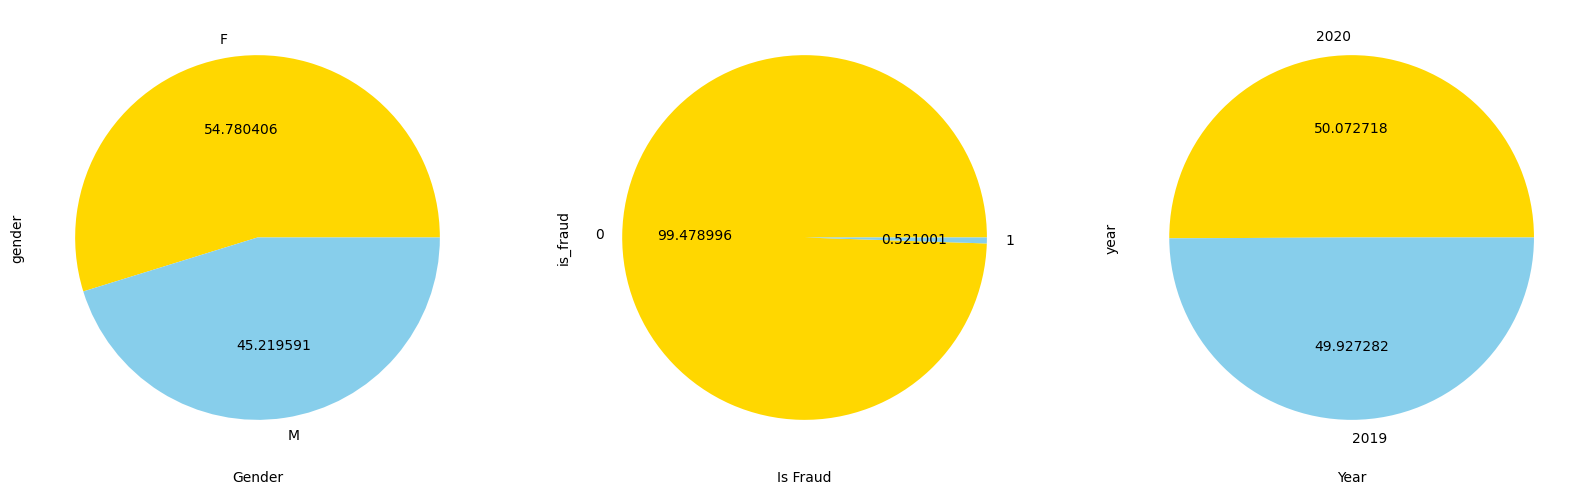

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,30))
fraud['gender'].value_counts().plot(kind='pie', autopct='%2f', colors=['gold', 'skyblue'], ax=ax1) 
fraud['is_fraud'].value_counts().plot(kind='pie', autopct='%2f', colors=['gold', 'skyblue'], ax=ax2) 
fraud['year'].value_counts().plot(kind='pie', autopct='%2f', colors=['gold', 'skyblue'], ax=ax3) 
 
ax1.set_xlabel('Gender')
ax2.set_xlabel('Is Fraud') 
ax3.set_xlabel('Year')
plt.show()

The above pie charts illustrate the proportion of the binary values for gender, is_fraud, and year. For gender, 54.78% of observations in the data set are females while the remaining 45.22% are males. As for fraud, there is a clear imbalance between the 2 classes where 99.48% of the transactions are classified as not fraudulent whereas only 0.52% are fraudulent. Therefore, a resampling technique(s) needs to be applied to overcome the issue of imbalance. Lastly, as mentioned earlier, the distribution for year is almost equal, indicating equal representation of the years in the data set. 

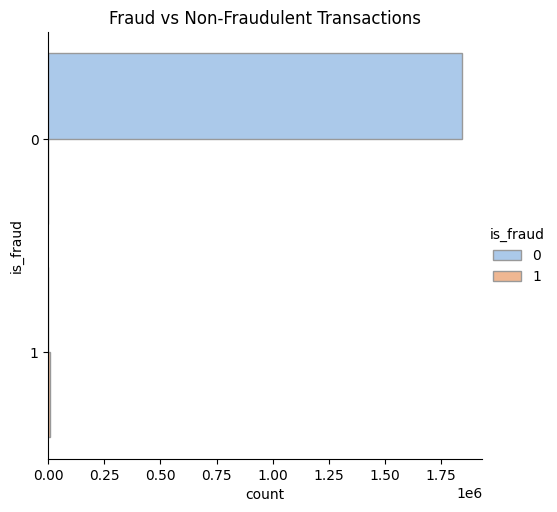

In [25]:
sns.catplot(
    data = fraud, y='is_fraud', hue='is_fraud', kind='count',
    palette="pastel", edgecolor=".6"
).set(title = 'Fraud vs Non-Fraudulent Transactions')

Again, but in the form of a horizontal barplot, this shows the unequal distribution between legitmate and fraudulent transactions and we can still see that majority of the transactions are classified as legitimate.  

In [26]:
top_10_city = fraud['city'].value_counts().sort_values(ascending=False)
top_10_city = top_10_city.head(10)
top_10_city

Birmingham     8040
San Antonio    7312
Utica          7309
Phoenix        7297
Meridian       7289
Warren         6584
Conway         6574
Cleveland      6572
Thomas         6571
Houston        5865
Name: city, dtype: int64

In [27]:
top_10_states = fraud['state'].value_counts().sort_values(ascending=False) 
top_10_states = top_10_states.head(10)
top_10_states

TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
Name: state, dtype: int64

In [28]:
top_10_jobs = fraud['job'].value_counts().sort_values(ascending=False)
top_10_jobs = top_10_jobs.head(10)
top_10_jobs

Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
Designer, ceramics/pottery    11688
Environmental consultant      10974
Financial adviser             10963
Systems developer             10962
IT trainer                    10943
Name: job, dtype: int64

Given that city, state, and job have large unique values (city: 906, state: 51, job: 497), it would be difficult to visualize each in a barplot. Therefore, to overcome this, I took the top 10 cities, states, and jobs based on their frequency to ease the analysis. 

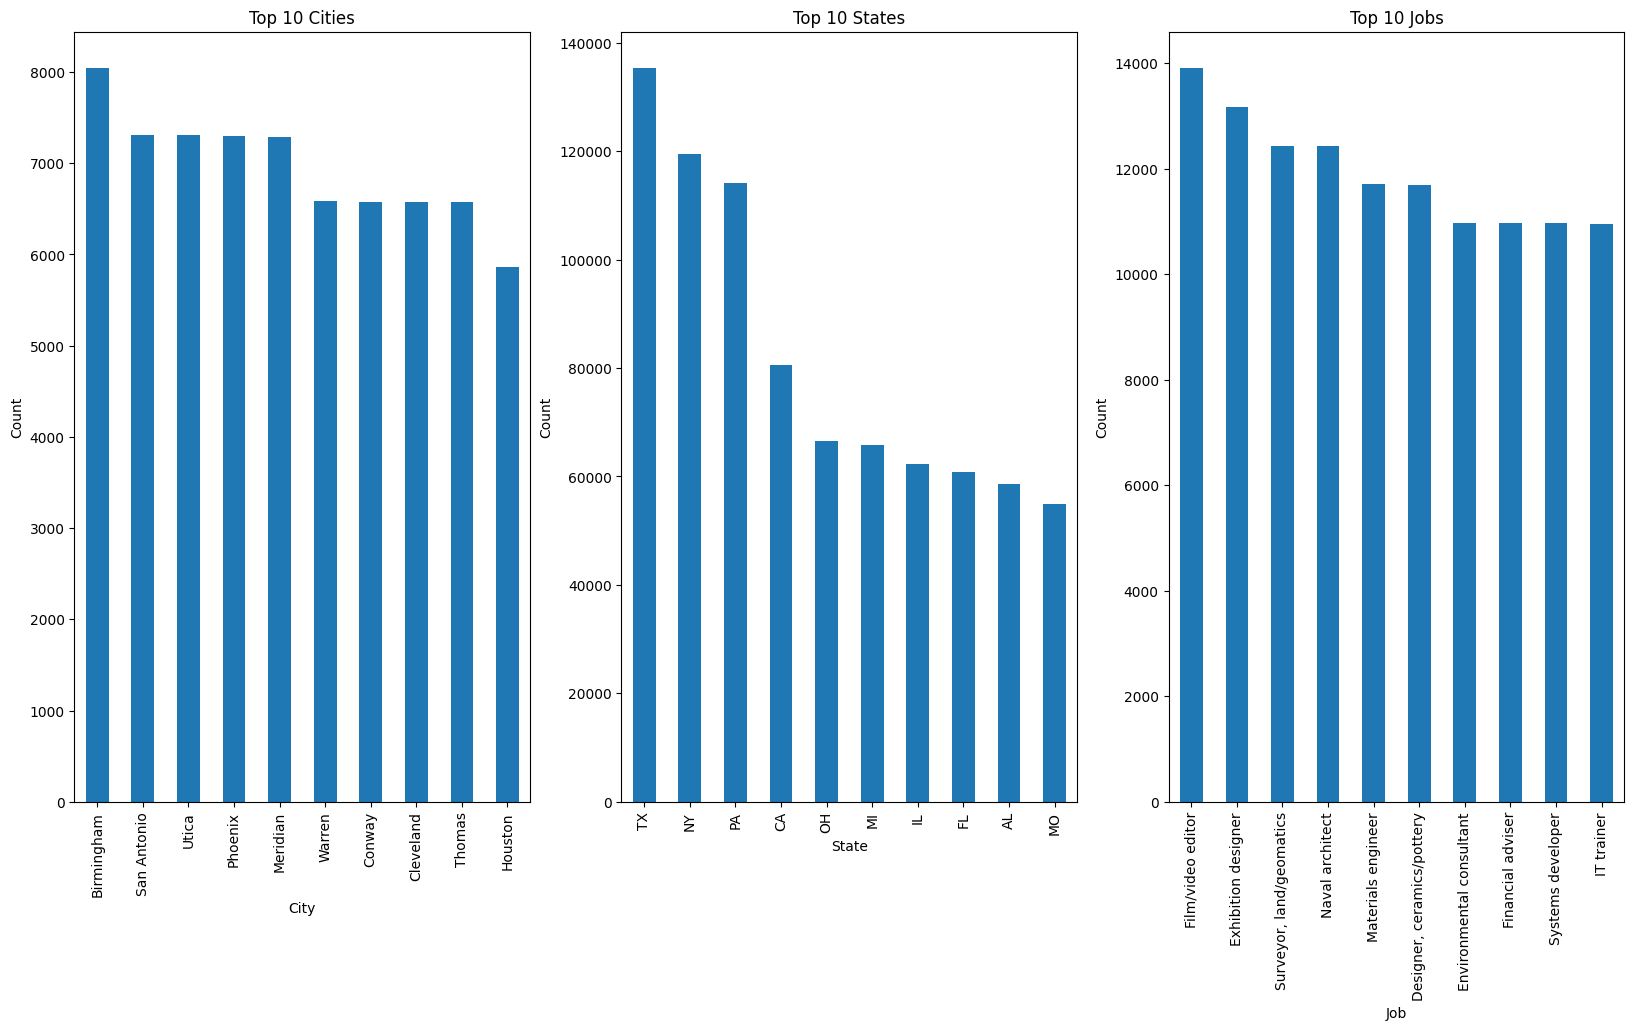

In [29]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
top_10_city.plot(kind='bar', ax=ax[0]).set_title('Top 10 Cities') 
top_10_states.plot(kind='bar', ax=ax[1]).set_title('Top 10 States') 
top_10_jobs.plot(kind='bar', ax=ax[2]).set_title('Top 10 Jobs')

ax[0].set_xlabel('City')
ax[1].set_xlabel('State')
ax[2].set_xlabel('Job') 

ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count') 
ax[2].set_ylabel('Count')
plt.show()

The above bar plots displays each of the top 10 observations for city, state, and job. Looking at each plot, starting with city, majority of the transactions took place in Birmingham whereas for state, Texas (TX) stood out to be the majority class in the variable and is the state where most transactions have occured. For job, a large number of credit card holder have jobs as film/video editors.

In [30]:
cat_features = ['category', 'month', 'day'] # Selecting a few of the categorical features 
num_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age'] # Numeric features

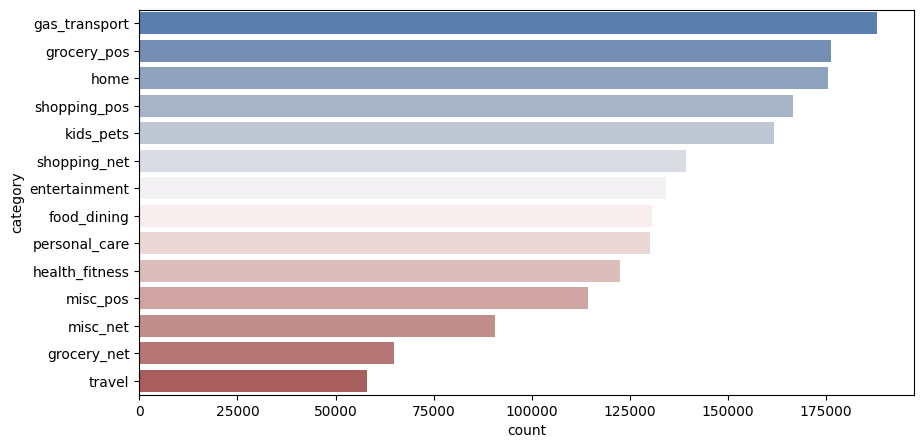

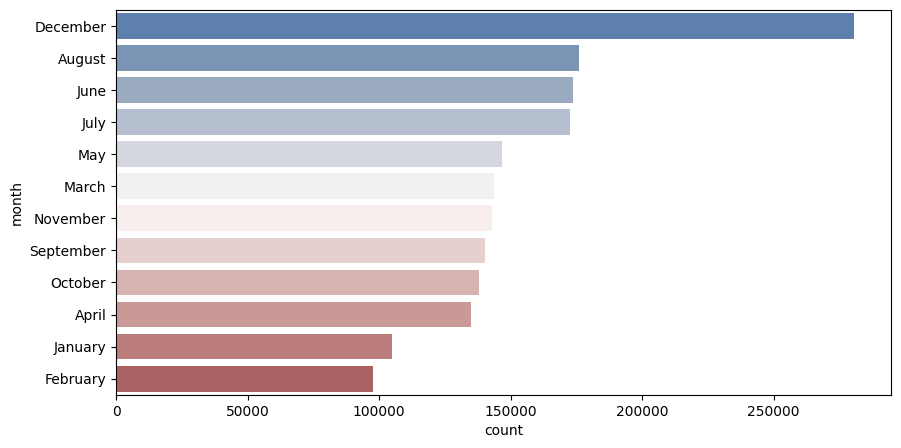

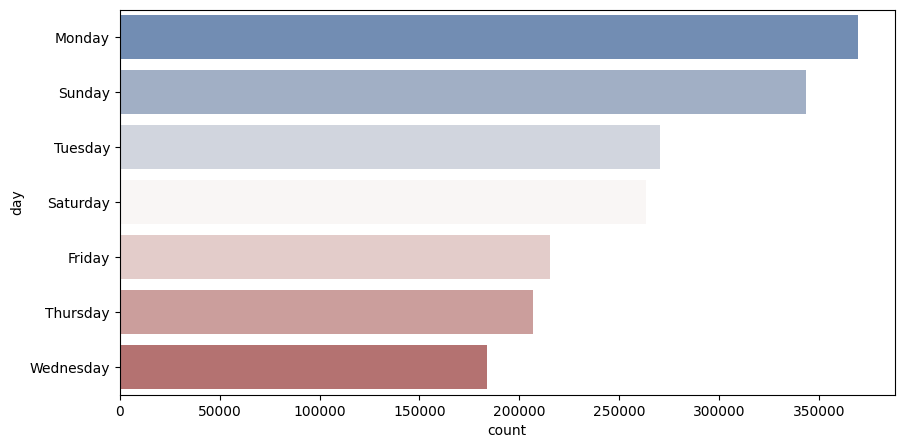

In [34]:
for i in cat_features: 
  fig, ax = plt.subplots(1,1, figsize=(10,5))
  sns.countplot(y=fraud[i][1:], data=fraud.iloc[1:], order=fraud[i][1:].value_counts().index, palette='vlag') 
  plt.yticks(fontsize=10)
  plt.xticks(fontsize=10)
plt.show()

Analyzing a few of the other categorical variables, we see that for the category of transaction, most of the individuals used their credit cards for gas and transportation, followed by groceries and home. As discussed earlier, most transactions were performed during the month of December and on a Monday. 

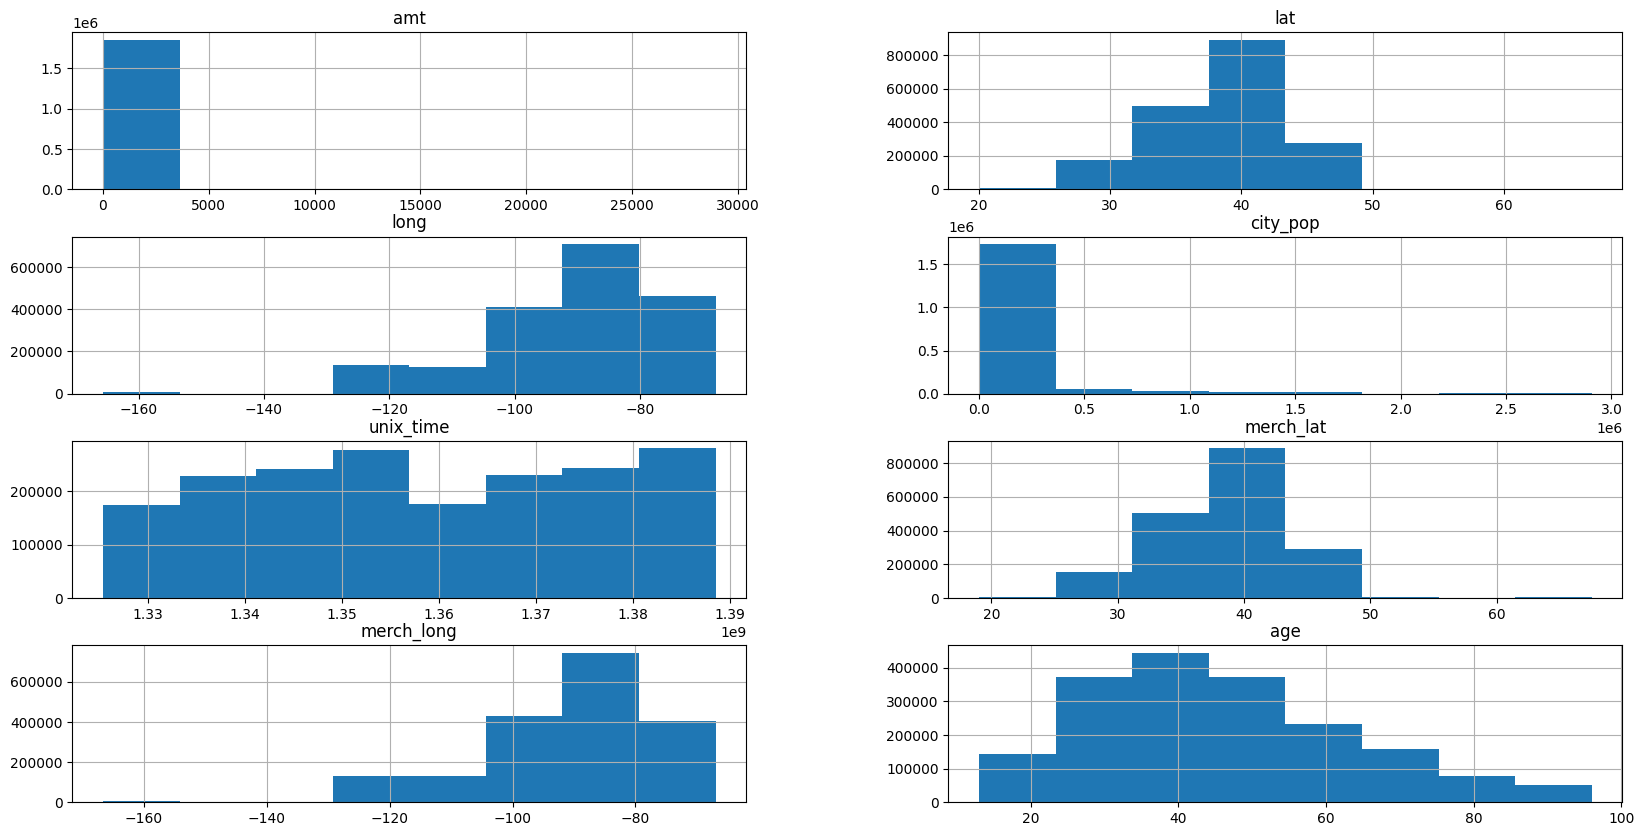

In [35]:
fig, ax = plt.subplots(4,2, figsize=(20,10))
for ax, c in zip(ax.flatten(), num_features):
  fraud.hist(column=c, ax=ax, bins=8)
plt.show()

Examining the distributions of the numeric attributes through a histogram, what can generalized is that most of the features are skewed. For both longitude and latitude of the transactions, they are each skewed in opposite in directions, latitude being right-skewed and longitude being left skewed and exactly the same interpretation can be made for merchant latitude and longitude. Unix_time on the other hand is the only numerical feature where there exists no skew. For age, it can be inferred that a large number of the individuals in the data are between the ages of 20 and 40 years old and looking at its distribution, it is right skewed. The distribution for amt (amount) and city_pop is not clear in this group plot therefore, plotting each of these in terms of logs will be required. 

[]

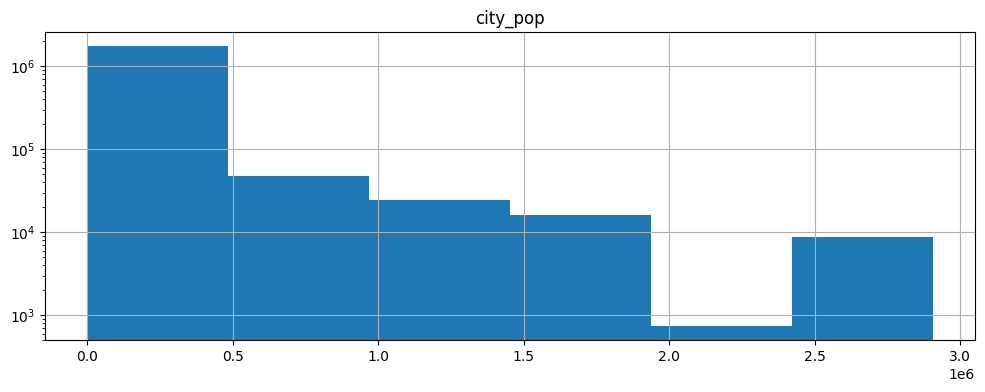

In [36]:
fraud.hist(column=['city_pop'], figsize=(12,4), bins=6)
plt.semilogy()

[]

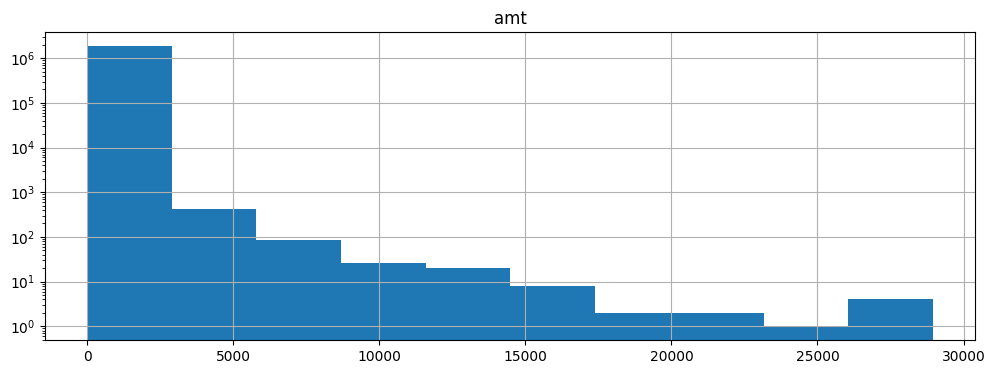

In [37]:
fraud.hist(column=['amt'], figsize=(12,4))
plt.semilogy()

Getting a better visualiztion of the distribution of city_pop and amt, we can see that each of their distributions are right skewed. 

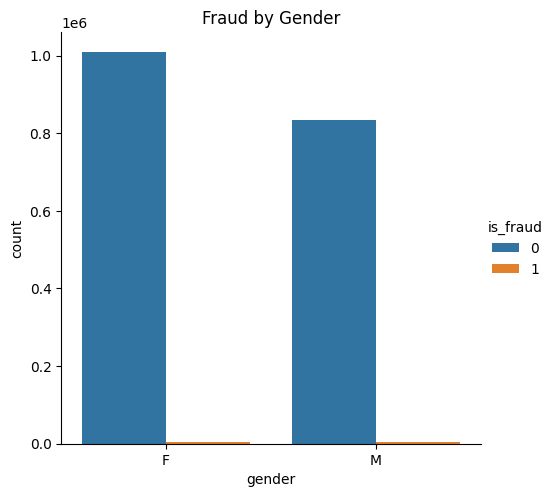

In [38]:
sns.catplot( 
    data = fraud, x='gender', hue='is_fraud', kind='count'
).set(title='Fraud by Gender')

In the barplot above, both males and females in the data for the most part have not made fraudulent transactions. However, there appeares to be a few observations that are fraudulent for both genders though its not easlity visible on this graph.

In [39]:
fraud.groupby(fraud['gender'])['is_fraud'].value_counts()

gender  is_fraud
F       0           1009850
        1              4899
M       0            832893
        1              4752
Name: is_fraud, dtype: int64

Taking a closer look, though the frequency is pretty small in comparison to non-fraud, females are making more fraud transactions than males however, the difference between the two genders is not large. 

Text(0.5, 1.0, 'Fraud by Age Group')

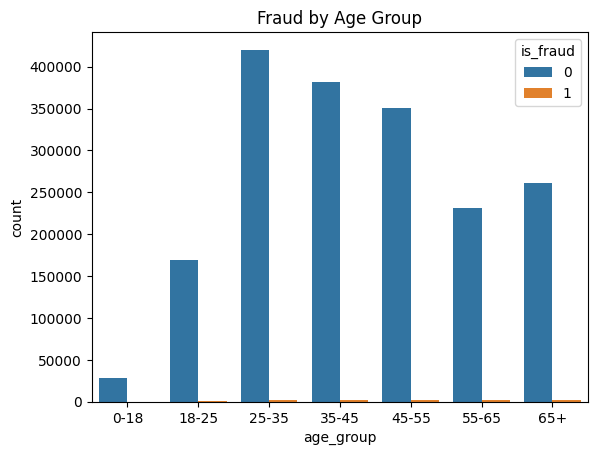

In [40]:
fraud['age_group'] = pd.cut(fraud.age, bins=[0,18,25,35,45,55,65,float('inf')], right=True, labels=['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']) 
sns.countplot(data=fraud, x='age_group', hue='is_fraud').set_title('Fraud by Age Group')

In [41]:
fraud.groupby(fraud['age_group'])['is_fraud'].value_counts()

age_group  is_fraud
0-18       0            27753
           1              149
18-25      0           169647
           1              951
25-35      0           420229
           1             1830
35-45      0           381961
           1             1522
45-55      0           350912
           1             1850
55-65      0           231492
           1             1585
65+        0           260749
           1             1764
Name: is_fraud, dtype: int64

With respect to age range of credit card holders involved in fraudulent transactions, people between the ages 45-55 had the highest occurence of fraud, followed by individuals between the ages 25-35, 65+, 55-65, and 35-45 years of age.  

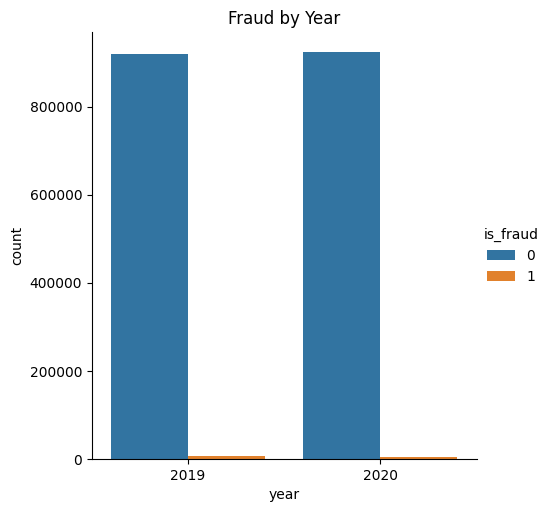

In [42]:
sns.catplot( 
    data = fraud, x='year',hue='is_fraud', kind='count'
).set(title='Fraud by Year')

In [43]:
fraud.groupby(fraud['year'])['is_fraud'].value_counts()

year  is_fraud
2019  0           919630
      1             5220
2020  0           923113
      1             4431
Name: is_fraud, dtype: int64

Similar to fraud by gender, most individuals did not perform fraudulent transactions for both years. However, taking a further look, more fraudulent transactions were performed in 2019 than in 2020. 

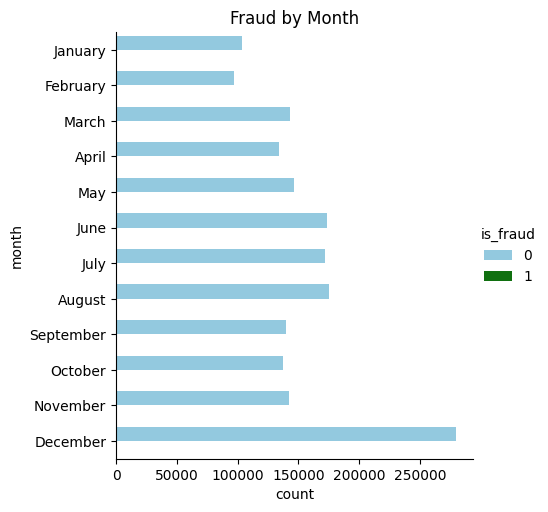

In [44]:
sns.catplot( 
    data = fraud,y='month',hue='is_fraud', kind='count', palette=sns.color_palette(['skyblue', 'green'])
).set(title='Fraud by Month')
plt.rcParams['figure.figsize']=(10,20)

In [45]:
fraud.groupby(fraud['month'])['is_fraud'].value_counts()

month      is_fraud
April      0           134292
           1              678
August     0           175321
           1              797
December   0           279748
           1              850
February   0            96804
           1              853
January    0           103878
           1              849
July       0           171792
           1              652
June       0           173048
           1              821
March      0           142851
           1              938
May        0           145940
           1              935
November   0           142374
           1              682
October    0           137268
           1              838
September  0           139427
           1              758
Name: is_fraud, dtype: int64

Though the barplot above shows that no fraudulent transaction were made for each month, when breaking it down, the above output shows that the month of March had the highest number of fraudulent transactions in comparison to all the months, followed by May, Feburary, December, and January. 

[Text(0.5, 1.0, 'Fraud by State')]

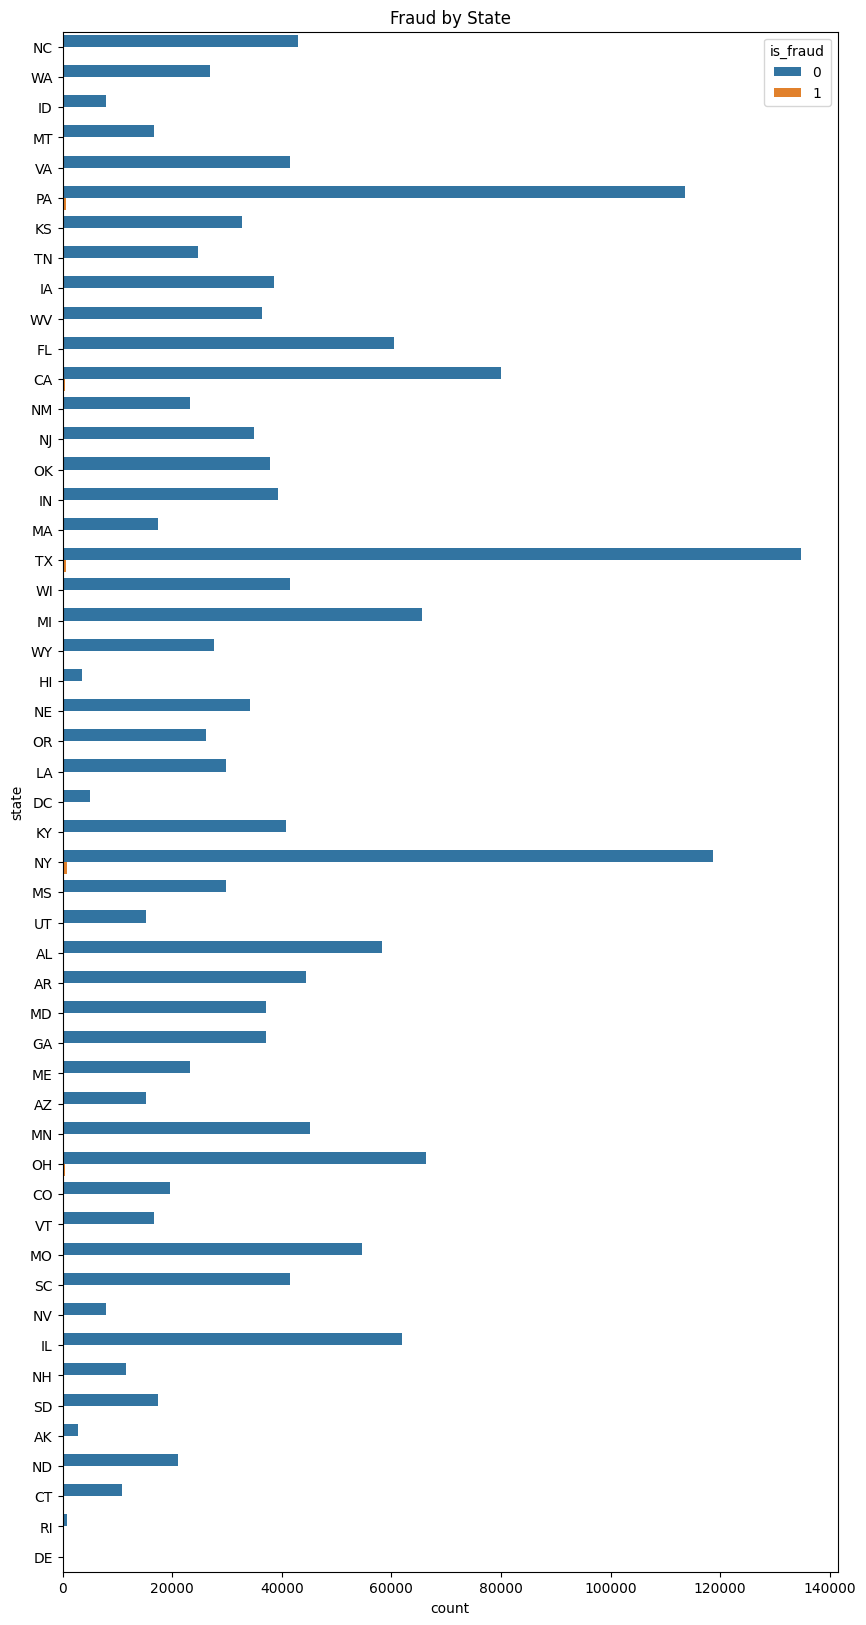

In [46]:
sns.countplot(data=fraud, y='state', hue='is_fraud').set(title='Fraud by State')

In [47]:
fraud.groupby(fraud['is_fraud'])['state'].value_counts()

is_fraud  state
0         TX       134677
          NY       118689
          PA       113601
          CA        80093
          OH        66267
                    ...  
1         ID           33
          DC           31
          HI           16
          RI           15
          DE            9
Name: state, Length: 101, dtype: int64

In the barplot, it can be observed that there are a few states that visbly show that fraudulent transaction have occured in those states, namely New York State (NY), Pennsylvania (PA), Virginia (VA), Texas (TX) and others.   Again, like with the previous analysis, most of the transactions in each of the states were not fraudulent. 

[Text(0.5, 1.0, 'Fraud by Category')]

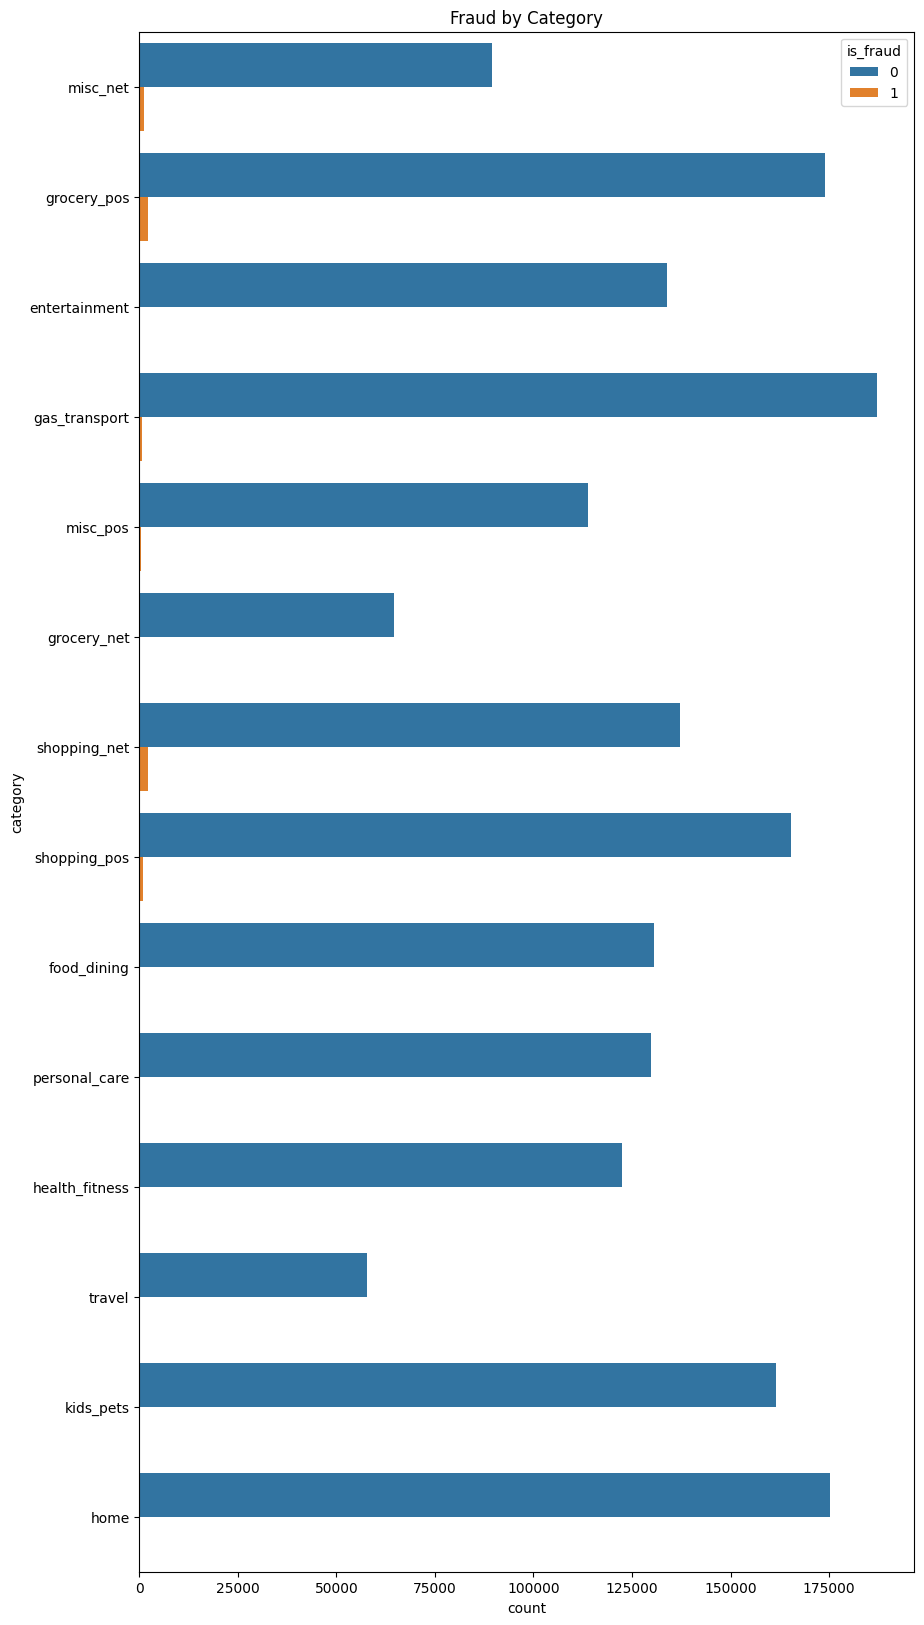

In [48]:
sns.countplot(data=fraud, y='category', hue='is_fraud').set(title='Fraud by Category')

The countplot above shows that out of all the categories people made transactions on, shopping, miscellaneous, and gas and transportation appeared to have higher counts of fraud as opposed to the remaining categories.  

In [49]:
fraud = fraud.drop('age_group', axis=1)

Since there are 2 age variables, I removed age_group since it will no longer be needed for the remainder of the analysis

In [ ]:
#pip install pandas-profiling

In [51]:
from pandas_profiling import ProfileReport
profile = ProfileReport(fraud)

<ipython-input-51-65f5ce699e0f>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [52]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The Pandas profile report above summarizes the dataset and some of the analysis I have conducted. 

In [ ]:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/drive/MyDrive/CIND 820/Descriptive Statistics Brief EDA.ipynb